<a href="https://colab.research.google.com/github/amirgarsha/ann_MK/blob/main/classification_challanges.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## import libraries

In [3]:
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np

## Import Dataset

In [4]:
fmnist_dataset = keras.datasets.fashion_mnist

In [5]:
(X_train, y_train), (X_test, y_test) = fmnist_dataset.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [6]:
print( X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


In [7]:
X_train, X_test = X_train/255.0, X_test/255.0

## Define Model with different initialization

In [8]:
## model with He initialization
initializer_he = keras.initializers.HeNormal()

model_he_init = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(50, activation="relu", kernel_initializer= initializer_he),
    keras.layers.Dense(50, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
]

)

In [9]:
model_he_init.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 50)                39250     
                                                                 
 dense_1 (Dense)             (None, 50)                2550      
                                                                 
 dense_2 (Dense)             (None, 10)                510       
                                                                 
Total params: 42310 (165.27 KB)
Trainable params: 42310 (165.27 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [10]:
weight, bias = model_he_init.layers[1].get_weights()
print(weight)
print(bias)

[[ 0.03891434  0.05253461  0.04181346 ... -0.08875286 -0.05538568
  -0.01672399]
 [-0.06978759 -0.00679901  0.01599554 ...  0.00047328 -0.01894058
   0.00810254]
 [ 0.06503142  0.057297    0.01705495 ... -0.04423373  0.03958865
   0.02332523]
 ...
 [ 0.04255293  0.00020236  0.04319164 ... -0.0578229  -0.00106084
   0.05103454]
 [ 0.02682414  0.00523735 -0.0786102  ...  0.07295957  0.07698792
   0.03330302]
 [ 0.08846919  0.00905605 -0.02836808 ...  0.02727209 -0.00330205
   0.03092334]]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]


In [11]:
model_he_init.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [12]:
##fit model
history_he_init = model_he_init.fit(X_train, y_train, epochs=50, validation_split=0.15)

Epoch 1/50
1594/1594 [==============================] - 4s 2ms/step - loss: 0.8059 - accuracy: 0.7250 - val_loss: 0.5646 - val_accuracy: 0.8073
Epoch 2/50
1594/1594 [==============================] - 4s 2ms/step - loss: 0.5184 - accuracy: 0.8204 - val_loss: 0.4980 - val_accuracy: 0.8263
Epoch 3/50
1594/1594 [==============================] - 4s 3ms/step - loss: 0.4685 - accuracy: 0.8367 - val_loss: 0.4804 - val_accuracy: 0.8297
Epoch 4/50
1594/1594 [==============================] - 4s 2ms/step - loss: 0.4387 - accuracy: 0.8468 - val_loss: 0.4562 - val_accuracy: 0.8332
Epoch 5/50
1594/1594 [==============================] - 3s 2ms/step - loss: 0.4179 - accuracy: 0.8536 - val_loss: 0.4307 - val_accuracy: 0.8474
Epoch 6/50
1594/1594 [==============================] - 5s 3ms/step - loss: 0.4020 - accuracy: 0.8601 - val_loss: 0.4193 - val_accuracy: 0.8523
Epoch 7/50
1594/1594 [==============================] - 4s 2ms/step - loss: 0.3901 - accuracy: 0.8626 - val_loss: 0.4028 - val_accuracy:

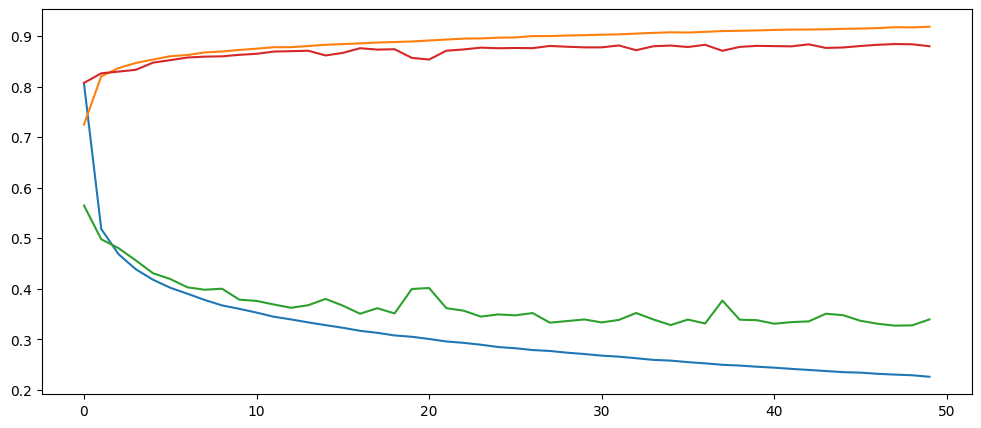

In [13]:
##plot
fig, ax = plt.subplots(figsize=(12, 5))
ax.plot(history_he_init.history["loss"] , label="train loss")
ax.plot(history_he_init.history["accuracy"], label="train accuracy")
ax.plot(history_he_init.history["val_loss"], label="validation loss")
ax.plot(history_he_init.history["val_accuracy"], label="validation accuracy")

In [14]:
## model with Lecunn initialization
initializer_lecun = keras.initializers.LecunNormal()

model_lecun_init = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(50, activation="selu", kernel_initializer= initializer_lecun),
    keras.layers.Dense(50, activation="selu"),
    keras.layers.Dense(10, activation="softmax")
]

)

In [ ]:
model_lecun_init.summary()

In [ ]:
weight_lecun, bias_lecun = model_lecun_init.layers[1].get_weights()
print(weight_lecun)
print(bias_lecun)

In [ ]:
model_lecun_init.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [18]:
##fit model
history_lecun = model_lecun_init.fit(X_train, y_train, epochs=50, validation_split=0.15)

Epoch 1/50
1594/1594 [==============================] - 4s 2ms/step - loss: 0.6357 - accuracy: 0.7824 - val_loss: 0.5066 - val_accuracy: 0.8190
Epoch 2/50
1594/1594 [==============================] - 4s 2ms/step - loss: 0.4688 - accuracy: 0.8342 - val_loss: 0.4630 - val_accuracy: 0.8346
Epoch 3/50
1594/1594 [==============================] - 4s 3ms/step - loss: 0.4356 - accuracy: 0.8457 - val_loss: 0.4381 - val_accuracy: 0.8433
Epoch 4/50
1594/1594 [==============================] - 4s 2ms/step - loss: 0.4163 - accuracy: 0.8519 - val_loss: 0.4222 - val_accuracy: 0.8512
Epoch 5/50
1594/1594 [==============================] - 3s 2ms/step - loss: 0.4028 - accuracy: 0.8570 - val_loss: 0.4035 - val_accuracy: 0.8550
Epoch 6/50
1594/1594 [==============================] - 4s 3ms/step - loss: 0.3902 - accuracy: 0.8614 - val_loss: 0.4221 - val_accuracy: 0.8466
Epoch 7/50
1594/1594 [==============================] - 4s 2ms/step - loss: 0.3804 - accuracy: 0.8642 - val_loss: 0.4070 - val_accuracy:

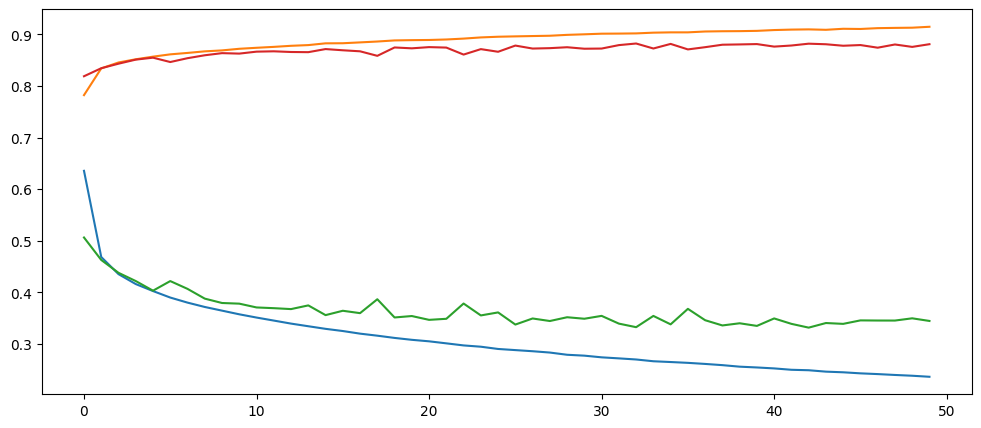

In [19]:
##plot
fig, ax = plt.subplots(figsize=(12, 5))
ax.plot(history_lecun.history["loss"] , label="train loss")
ax.plot(history_lecun.history["accuracy"], label="train accuracy")
ax.plot(history_lecun.history["val_loss"], label="validation loss")
ax.plot(history_lecun.history["val_accuracy"], label="validation accuracy")

## Model with Batch Normalization

In [21]:
## model with Batch Normalization
initializer_he = keras.initializers.HeNormal()

model_BNorm = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(50, activation="relu", kernel_initializer= initializer_he),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(50, activation="relu"),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(10, activation="softmax")
]

)

In [22]:
model_BNorm.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_9 (Dense)             (None, 50)                39250     
                                                                 
 batch_normalization_3 (Bat  (None, 50)                200       
 chNormalization)                                                
                                                                 
 dense_10 (Dense)            (None, 50)                2550      
                                                                 
 batch_normalization_4 (Bat  (None, 50)                200       
 chNormalization)                                                
                                                                 
 dense_11 (Dense)            (None, 10)               

In [23]:
model_BNorm.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [24]:
##fit model
history_BNorm = model_BNorm.fit(X_train, y_train, epochs=50, validation_split=0.15)

Epoch 1/50
1594/1594 [==============================] - 6s 3ms/step - loss: 0.6272 - accuracy: 0.7894 - val_loss: 0.4684 - val_accuracy: 0.8319
Epoch 2/50
1594/1594 [==============================] - 5s 3ms/step - loss: 0.4586 - accuracy: 0.8392 - val_loss: 0.4177 - val_accuracy: 0.8473
Epoch 3/50
1594/1594 [==============================] - 5s 3ms/step - loss: 0.4175 - accuracy: 0.8521 - val_loss: 0.3825 - val_accuracy: 0.8641
Epoch 4/50
1594/1594 [==============================] - 7s 4ms/step - loss: 0.3924 - accuracy: 0.8609 - val_loss: 0.3771 - val_accuracy: 0.8647
Epoch 5/50
1594/1594 [==============================] - 5s 3ms/step - loss: 0.3783 - accuracy: 0.8656 - val_loss: 0.3792 - val_accuracy: 0.8633
Epoch 6/50
1594/1594 [==============================] - 4s 3ms/step - loss: 0.3610 - accuracy: 0.8708 - val_loss: 0.3541 - val_accuracy: 0.8691
Epoch 7/50
1594/1594 [==============================] - 6s 4ms/step - loss: 0.3491 - accuracy: 0.8748 - val_loss: 0.3707 - val_accuracy:

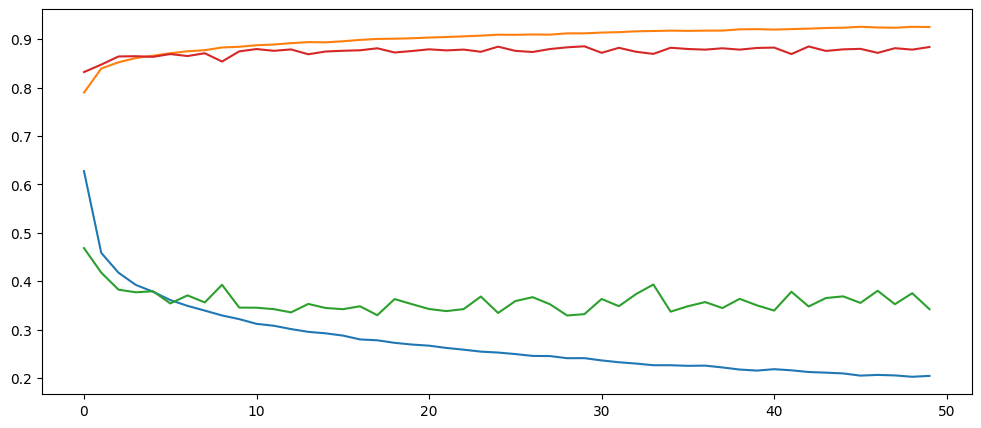

In [26]:
##plot
fig, ax = plt.subplots(figsize=(12, 5))
ax.plot(history_BNorm.history["loss"] , label="train loss")
ax.plot(history_BNorm.history["accuracy"], label="train accuracy")
ax.plot(history_BNorm.history["val_loss"], label="validation loss")
ax.plot(history_BNorm.history["val_accuracy"], label="validation accuracy")

## Batch normalization before activation function

In [27]:
## model with Lecunn initialization
initializer_lecun = keras.initializers.LecunNormal()

model_BNorm_before = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(50, kernel_initializer= initializer_lecun),
    keras.layers.BatchNormalization(),
    keras.layers.Activation("selu"),
    keras.layers.Dense(50),
    keras.layers.BatchNormalization(),
    keras.layers.Activation("selu"),
    keras.layers.Dense(10, activation="softmax")
]

)

In [28]:
## compile model
model_BNorm_before.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [29]:
## fit model
history_BNorm_before = model_BNorm_before.fit(X_train, y_train, epochs=50, validation_split=0.15)

Epoch 1/50
1594/1594 [==============================] - 5s 3ms/step - loss: 0.5832 - accuracy: 0.7995 - val_loss: 0.4499 - val_accuracy: 0.8391
Epoch 2/50
1594/1594 [==============================] - 5s 3ms/step - loss: 0.4589 - accuracy: 0.8389 - val_loss: 0.4246 - val_accuracy: 0.8469
Epoch 3/50
1594/1594 [==============================] - 4s 3ms/step - loss: 0.4262 - accuracy: 0.8513 - val_loss: 0.3999 - val_accuracy: 0.8568
Epoch 4/50
1594/1594 [==============================] - 4s 3ms/step - loss: 0.4077 - accuracy: 0.8549 - val_loss: 0.3904 - val_accuracy: 0.8636
Epoch 5/50
1594/1594 [==============================] - 6s 3ms/step - loss: 0.3930 - accuracy: 0.8603 - val_loss: 0.3845 - val_accuracy: 0.8651
Epoch 6/50
1594/1594 [==============================] - 4s 3ms/step - loss: 0.3809 - accuracy: 0.8660 - val_loss: 0.3799 - val_accuracy: 0.8649
Epoch 7/50
1594/1594 [==============================] - 4s 3ms/step - loss: 0.3698 - accuracy: 0.8680 - val_loss: 0.3796 - val_accuracy:

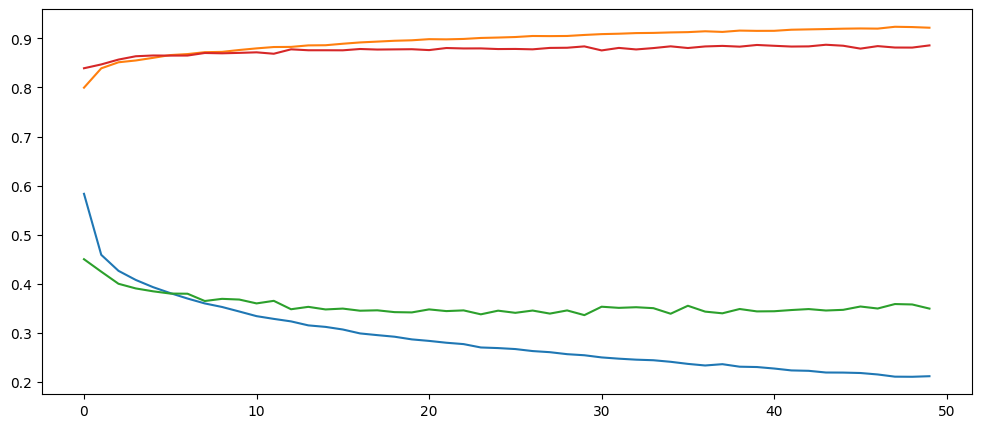

In [30]:
##plot
fig, ax = plt.subplots(figsize=(12, 5))
ax.plot(history_BNorm_before.history["loss"] , label="train loss")
ax.plot(history_BNorm_before.history["accuracy"], label="train accuracy")
ax.plot(history_BNorm_before.history["val_loss"], label="validation loss")
ax.plot(history_BNorm_before.history["val_accuracy"], label="validation accuracy")